In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [11]:
X = df.iloc[:, [3,4]].values

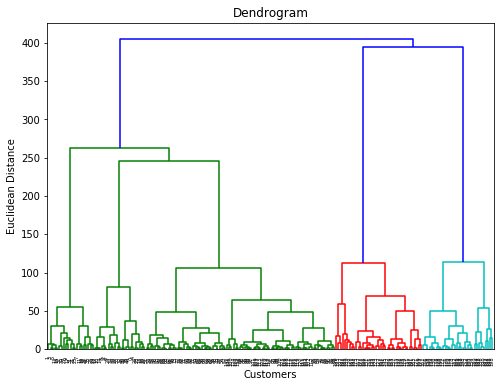

In [27]:
# using dendrogram to find optimal number of clusters
import scipy.cluster.hierarchy as sch
# linkage = algorithm for hier. cluster
# ward method = minimizing wcss variance within each cluster 
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [28]:
# Fitting hierarchial clustering to the mall dataset 
from sklearn.cluster import AgglomerativeClustering
# affinity = type of distance to do linkage
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
# fit_predict(X) = Performs clustering on X and returns cluster labels.
y_hc = hc.fit_predict(X)

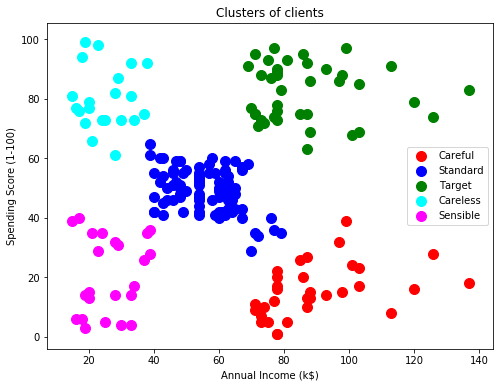

In [30]:
# Visualising the clusters
# Graph clusters
# plt.scatter(x = Annual Income,y = Spending Score,s = size, c = color, label = 'whatever you want')
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3,0], X[y_hc == 3,1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4,0], X[y_hc == 4,1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()